# Algoritmos Genéticos
### Gabriel Negreiros Lima

1. Implementar um algoritmo genético para resolver o problema de maximização da função Alpine 2

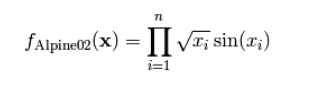

Nesta equação, n representa o número de dimensões e x_i pertencente a [0,10] para i = 1, ..., n. 

## Representação
Neste trabalho teremos n = 2, portanto:

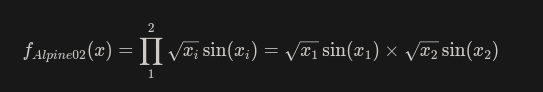

O Máximo Global da função é igual a `f(x^*)=2.808^n => f(x1,x2)=7.88`.

## Função *fitness*
A função de aptidão utilizada será `f_fit(x) = f(x) + 7.88`, que em módulo é o máximo e mínimo desta função, e desta forma não teremos resultados negativos na função *fitness*. Neste trabalho avaliaremos com 3 casas decimais.

In [376]:
import math
from random import randint
import numpy as np

def f_alpine02(x, y):
    return math.sqrt(x)*math.sin(x) * math.sqrt(y)*math.sin(y)

def f_fit(x, y):
    return round(f_alpine02(x, y) + 7.88, 3)

MAX_ALPINE = f_fit(7.917, 7.917) # 7.88 * 2
MAX_ALPINE

15.766

## População inicial

In [3]:
NUMBER_OF_INDIVIDUALS = 100

x_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
y_s = [np.random.uniform(0,10) for _ in range(0,NUMBER_OF_INDIVIDUALS)]
population = np.zeros((NUMBER_OF_INDIVIDUALS,2))

for index, element in enumerate(x_s):
    x_s[index] = round(x_s[index], 3)
    y_s[index] = round(y_s[index], 3)
    population[index][0] = x_s[index]
    population[index][1] = y_s[index]

population

array([[6.996, 0.474],
       [3.593, 9.737],
       [4.244, 0.198],
       [0.69 , 8.807],
       [4.516, 5.834],
       [8.957, 3.184],
       [4.56 , 9.407],
       [9.107, 0.812],
       [8.197, 5.406],
       [6.777, 1.08 ],
       [7.604, 9.978],
       [7.963, 6.751],
       [6.761, 6.529],
       [2.735, 1.626],
       [6.454, 8.591],
       [2.372, 4.294],
       [4.261, 4.668],
       [7.035, 2.18 ],
       [6.095, 6.703],
       [8.298, 2.417],
       [9.833, 6.14 ],
       [1.314, 9.995],
       [3.322, 6.74 ],
       [7.628, 0.663],
       [3.503, 7.306],
       [3.162, 2.307],
       [3.701, 1.494],
       [6.246, 7.573],
       [0.013, 5.486],
       [5.178, 8.11 ],
       [2.387, 2.428],
       [3.35 , 4.798],
       [0.776, 8.531],
       [3.993, 2.203],
       [3.549, 6.349],
       [5.875, 3.078],
       [2.56 , 2.89 ],
       [0.556, 2.381],
       [6.865, 1.192],
       [7.783, 5.958],
       [5.169, 8.446],
       [0.521, 5.08 ],
       [6.183, 3.084],
       [9.3

## Seleção: roleta
Para fazer a seleção da roleta, iremos utilizar a função `f_fit` para gerar a roleta:

In [4]:
X_POS = 0 
Y_POS = 1

def roleta(population):
    sum_fitness = 0
    sum_by_individual = []
    temp = np.array([])                       # temporary to save the fitness
    number_of_rows, _ = population.shape      # population size
    fitnesses = np.zeros((number_of_rows,2))  # matrix with position and fitness of each one
    position = 0
    
    # saves all fitnesses and position of the individual
    for i in population:
        temp = f_fit(i[X_POS], i[Y_POS]) 
        fitnesses[position][0] = position
        fitnesses[position][1] = temp
        position += 1
    
    # sort by fitnesses
    fitnesses = fitnesses[fitnesses[:, 1].argsort()]
    
    for fit in fitnesses:
        sum_fitness += fit[1]  
        sum_by_individual.append([
            fit[0],
            sum_fitness
        ])   
            
    sum_fitness = int(sum_fitness * 1000)  # make it a integer to ease
    rand_value = randint(0, sum_fitness)   # randomizing
    
    #print(f"sum by individual with index: \n{sum_by_individual}")
    rand_value = float(rand_value / 1000)   # make it back to float
    sum_fitness = float(sum_fitness / 1000)
    
    
    # find the first element that has fitness sum greater than random
    ##print(f"sum_fitness_total: {sum_fitness}")
    ##print(f"rand_value: {rand_value}")
    for ind_with_sum  in sum_by_individual:
        if ind_with_sum[1] >= rand_value: 
            #print(f"fitness sum and index of the individual: {ind_with_sum}")
            #print(f"individual: {population[int(ind_with_sum[0])]}")
            return population[int(ind_with_sum[0])]
        
        
roleta(population)

array([9.721, 8.882])

Agora que temos a função roleta, podemos selecionar os pais da próxima geração. Para uma população definida na variável NUMBER_OF_INDIVIDUALS, elegemos a metade de casais que serão os pais, e então estes serão passados para o cruzamento.

In [5]:
NUMBER_OF_PARENTS = int(NUMBER_OF_INDIVIDUALS/2)

def select_parents(population):
    
    parents = np.zeros((NUMBER_OF_PARENTS,2))
    for index in range(0,int(NUMBER_OF_PARENTS)):
        parents[index] = roleta(population)
    return parents
        
parents = select_parents(population)
parents

array([[3.162, 2.307],
       [5.698, 8.215],
       [9.336, 0.292],
       [4.933, 6.767],
       [9.833, 6.14 ],
       [2.735, 1.626],
       [1.742, 5.373],
       [6.761, 6.529],
       [7.783, 5.958],
       [0.69 , 8.807],
       [4.47 , 0.465],
       [4.679, 1.136],
       [8.817, 7.234],
       [0.776, 8.531],
       [6.095, 6.703],
       [1.67 , 2.168],
       [3.35 , 4.798],
       [0.556, 2.381],
       [3.593, 9.737],
       [5.169, 8.446],
       [9.336, 0.292],
       [4.719, 5.33 ],
       [4.718, 2.432],
       [4.47 , 0.465],
       [0.776, 8.531],
       [6.897, 1.173],
       [4.407, 3.182],
       [7.77 , 7.965],
       [3.35 , 4.798],
       [1.465, 2.385],
       [3.26 , 3.044],
       [9.721, 8.882],
       [8.817, 7.234],
       [1.465, 2.385],
       [9.721, 8.882],
       [4.923, 6.648],
       [1.532, 7.616],
       [9.6  , 6.462],
       [9.476, 3.439],
       [4.718, 2.432],
       [2.923, 2.969],
       [4.923, 6.648],
       [8.298, 2.417],
       [9.8

## Operadores Genéticos
### Crossover de ponto único
Dados dois indivíduos, constituiremos um novo par de indivíduos

In [10]:
def crossover(parent_a, parent_b):
    children_a = [parent_a[0], parent_b[1]]
    children_b = [parent_b[0], parent_a[1]]
    
    return (children_a, children_b)

children_a, children_b = crossover(parents[0], parents[1])
print(children_a, children_b)

[3.162, 8.215] [5.698, 2.307]


### Mutação Gaussiana
Dado um indivíduo, realizar uma mudança local com um ajuste aleatório em ambas as posições:

In [362]:
def mutation(individual): 
    max_range_value = 2
    
    signal = randint(0, 3)  # 0 = + + | 1 = + - | 2 = - + | 3 = - - 
    delta_x = randint(0, max_range_value*1000)/1000 # same logic from roleta
    delta_y = randint(0, max_range_value*1000)/1000 
    
    probability = 50   # 0.5% 
    decisor = randint(1, 1000)
    
    if decisor <= probability:
        
        # signal choise
        if signal == 0:
            new_x = individual[0]+delta_x
            new_y = individual[1]+delta_y
        elif signal == 1:
            new_x = individual[0]+delta_x
            new_y = individual[1]-delta_y
        elif signal == 2:
            new_x = individual[0]-delta_x
            new_y = individual[1]+delta_y
        elif signal == 3:
            new_x = individual[0]-delta_x
            new_y = individual[1]-delta_y
        
        # boundaries
        if new_x > 10.0:
            new_x = 10.0
        elif new_x < 0:
            new_x = 0
        
        if new_y > 10.0:
            new_y = 10.0
        elif new_y < 0:
            new_y = 0
            
        return [round(new_x, 3), round(new_y, 3)]
    
    return individual

mutated = mutation(parents[4])
print(parents[4], mutated)

[9.833 6.14 ] [9.833 6.14 ]


## Mais algumas funções auxiliares
### Fitnesses para plots
Dada uma população, precisaremos do maior fitness, do menor, e do fitness médio para criar o gráfico de convergência.

In [366]:
def max_fitness(population):
    biggest = 0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit >= biggest:
            biggest = fit
    
    return biggest

max_fitness(population)

15.671

In [372]:
def mean_fitness(population):
    sum_value = 0.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        sum_value = sum_value + fit
        
    return sum_value / NUMBER_OF_INDIVIDUALS
    
mean_fitness(population)

7.780650000000003

In [373]:
def min_fitness(population):
    minor = 10.0
    
    for individual in population:
        fit = f_fit(individual[0], individual[1])
        
        if fit <= minor:
            minor = fit
    
    return minor

min_fitness(population)

2.278

## Algoritmo completo
Agora com as funções necessárias, montamos o algoritmo.

In [ ]:
max_gens = 100
actual_gen = 0 
difference = 0        # difference between max

while actual_gen <= max_gens and (MAX_ALPINE - difference) > 0.01:
    

# ToDo
- Plotar gráfico de convergência
  - Fitness do melhor
  - Fitness médio da população
  - Fitness do pior elemento